This notebook contains code intended to evaluate the pitch accuracy of a singing performance in comparison to an audio track. It is done by separating the audio track from the accompanied musical instrument and comparing the variation of pitches of the two audio tracks with time.

install python bindings for FFmpeg - with complex filtering support

In [2]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=639abf16c22eb2e4bd1c57e59f35534412b13609806ad3623c7fad336c6fb2f8
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


Install Initial modules to be fixed the Spleeter Issues

In [4]:
!pip install --upgrade pip setuptools
!pip install --upgrade cython
!pip install numpy
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.2 MB/s eta 0:00:00


install python bindings for spleeter - with complex audio separation support

In [5]:
!pip install spleeter

Initial Imports

In [80]:
import os
from spleeter.separator import Separator
from scipy.interpolate import interp1d
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr
import ffmpeg

Use *spleeter* to separate vocals from the original music file.

In [15]:
# Path to the Spleeter model. You can change it to the desired model.
spleeter_model = 'spleeter:2stems'

# Initialize the Spleeter separator
separator = Separator(spleeter_model)

# Path to the input audio file (WAV format)
input_audio_file = './audio1.mp3'

# Output directory for the separated audio files
output_directory = './separated_recordings'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Perform the separation
audio_data = separator.separate_to_file(input_audio_file, output_directory)

print("Original Audio Separation complete.")

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:2stems model file(s) extracted


INFO:spleeter:2stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


INFO:spleeter:File ./separated_recordings/audio1/vocals.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio1/vocals.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio1/accompaniment.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio1/accompaniment.wav written succesfully


Original Audio Separation complete.


Generate text array Using the audio clip one for lyrics.

In [17]:
# Initialize the recognizer
recognizer = sr.Recognizer()

# Load the audio file
audio_file = "/content/separated_recordings/audio1/vocals.wav"

with sr.AudioFile(audio_file) as source:
    # Adjust for ambient noise, if necessary
    recognizer.adjust_for_ambient_noise(source)

    # Record the audio
    audio_data = recognizer.record(source)

# Transcribe the audio to text
text1 = recognizer.recognize_google(audio_data)  # You can use other engines too

print(text1)

when the night has come and the land is dark in the Moon is the only light will sing Justin


convert it into a text array by splitting it into words or sentences using Python's string manipulation functions

In [18]:
text_array1 = text1.split()  # Split by spaces to get individual words

# Or, split by sentences if needed
sentences1 = text1.split('.')

Separate cover audio from the cover video file.

In [123]:
# input_file = 'video.mp4'
# output_file = 'audio2.mp3'

# ffmpeg.input(input_file).output(output_file, f='mp3').run()

Use *spleeter* to separate vocals from the cover music file.

In [20]:
# Path to the Spleeter model. You can change it to the desired model.
spleeter_model = 'spleeter:2stems'

# Initialize the Spleeter separator
separator = Separator(spleeter_model)

# Path to the input audio file (WAV format)
input_audio_file = './audio2.mp3'

# Output directory for the separated audio files
output_directory = './separated_recordings'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Perform the separation
audio_data2 = separator.separate_to_file(input_audio_file, output_directory)

print("Cover Song Audio Separation complete.")

INFO:spleeter:File ./separated_recordings/audio2/vocals.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio2/vocals.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio2/accompaniment.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio2/accompaniment.wav written succesfully


Cover Song Audio Separation complete.


Generate text array Using the audio clip one for lyrics.

In [21]:
# Initialize the recognizer
recognizer = sr.Recognizer()

# Load the audio file
audio_file = "/content/separated_recordings/audio2/vocals.wav"

with sr.AudioFile(audio_file) as source:
    # Adjust for ambient noise, if necessary
    recognizer.adjust_for_ambient_noise(source)

    # Record the audio
    audio_data = recognizer.record(source)

# Transcribe the audio to text
text2 = recognizer.recognize_google(audio_data)  # You can use other engines too

print(text2)

I want to


convert it into a text array by splitting it into words or sentences using Python's string manipulation functions

In [22]:
text_array2 = text2.split()  # Split by spaces to get individual words

# Or, split by sentences if needed
sentences2 = text2.split('.')

Extract pitch information from separated audio files using *librosa* python library.

In [122]:
# Paths to the separated audio files (voice and instrument)
# original_audio_file = '/content/separated_recordings/audio1/vocals.wav'
# cover_audio_file = '/content/separated_recordings/audio2/vocals.wav'

original_audio_file = "/content/audio1.mp3"
cover_audio_file = "/content/audio2.mp3"

# Load the original audio file
y_original_voice, sr_voice = librosa.load(original_audio_file)

# Load the cover audio file
y_cover_voice, sr_instrument = librosa.load(cover_audio_file)

# Extract the pitch information using librosa.piptrack for the original clip
f0_original_audio, voiced_flag, voiced_probs = librosa.pyin(y=y_original_voice, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Extract the pitch information using librosa.piptrack for the cover clip
f0_cover_audio, voiced_flag, voiced_probs = librosa.pyin(y=y_cover_voice, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

Load Audio Files in Wave Form

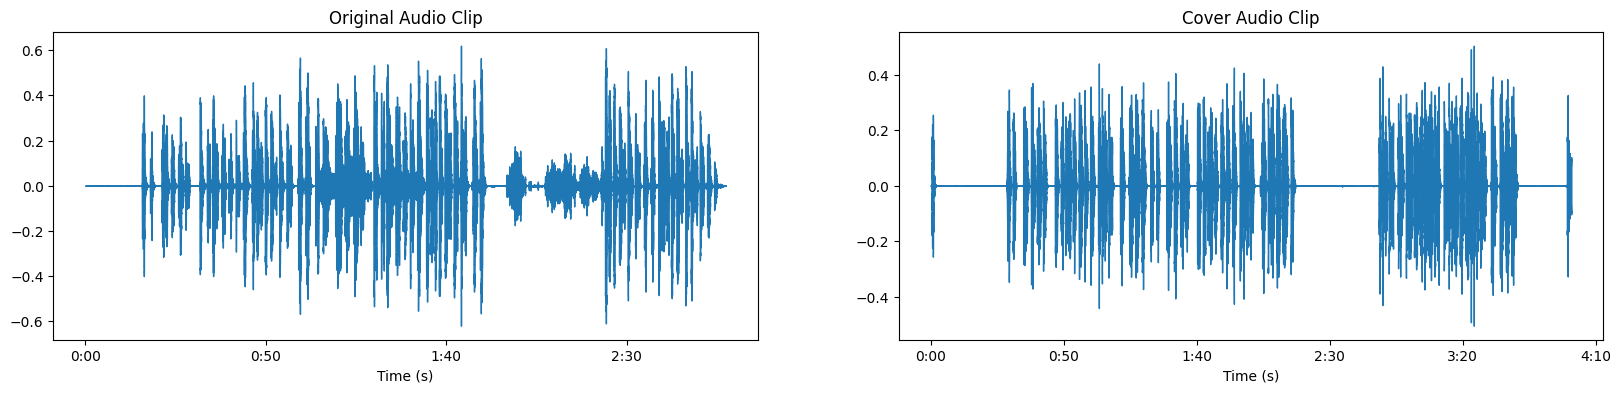

In [66]:
audio_file1 = "/content/separated_recordings/audio1/vocals.wav"
audio_file2 = "/content/separated_recordings/audio2/vocals.wav"
y, sr = librosa.load(audio_file1)
x, sr = librosa.load(audio_file2)

plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio Clip')
plt.xlabel('Time (s)')

plt.subplot(1, 2, 2)
librosa.display.waveshow(x, sr=sr)
plt.title('Cover Audio Clip')
plt.xlabel('Time (s)')
plt.show()


Generate Spectrogram

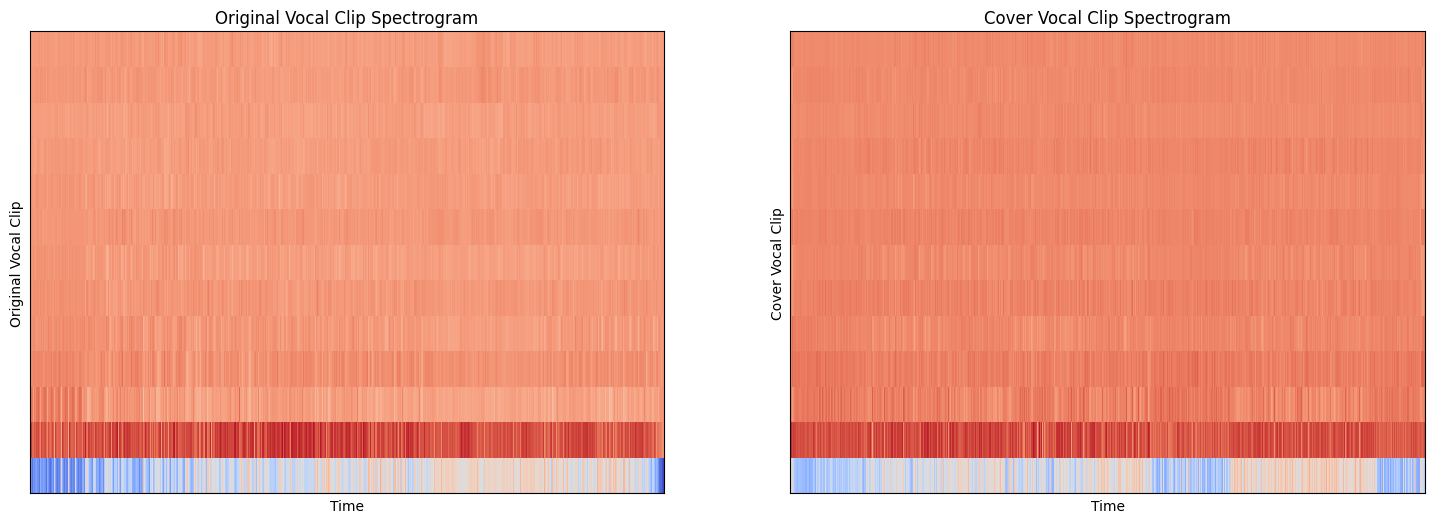

In [120]:
# audio_file01 = "/content/separated_recordings/audio1/vocals.wav"
# audio_file02 = "/content/separated_recordings/audio2/vocals.wav"

audio_file01 = "/content/audio1.mp3"
audio_file02 = "/content/audio2.mp3"

clip1, sr = librosa.load(audio_file01, sr=22050)
clip2, sr = librosa.load(audio_file02, sr=22050)

fft1 = np.fft.fft(clip1)
fft2 = np.fft.fft(clip2)

magnitude1 = np.fft.fft(clip1)
frequency1 = np.linspace(0,sr, len(magnitude1))
left_frequency = frequency1[:int(len(frequency1)/2)]
left_magnitude = magnitude1[:int(len(frequency1)/2)]

magnitude2 = np.fft.fft(clip2)
frequency2 = np.linspace(0,sr, len(magnitude2))
left_frequency = frequency2[:int(len(frequency2)/2)]
left_magnitude = magnitude2[:int(len(frequency2)/2)]

n_fft = 2048
hop_length = 512

stft1 = librosa.core.stft(clip1,hop_length=hop_length,n_fft=n_fft)
spectrogram1 = np.abs(stft1)

stft2 = librosa.core.stft(clip2,hop_length=hop_length,n_fft=n_fft)
spectrogram2 = np.abs(stft2)

# Create a figure with two subplots in a single row
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first spectrogram on the left subplot
OriginalClip = librosa.feature.mfcc(y=clip1, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(OriginalClip, sr=sr, hop_length=hop_length, ax=axes[0])
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Original Vocal Clip')
axes[0].set_title('Original Vocal Clip Spectrogram')



# Plot the second spectrogram on the right subplot
CoverClip = librosa.feature.mfcc(y=clip2, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(CoverClip, sr=sr, hop_length=hop_length, ax=axes[1])
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Cover Vocal Clip')
axes[1].set_title('Cover Vocal Clip Spectrogram')

# Show the plots
plt.show()

Plot variation of pitches of accompanied music track and singing voice with time.

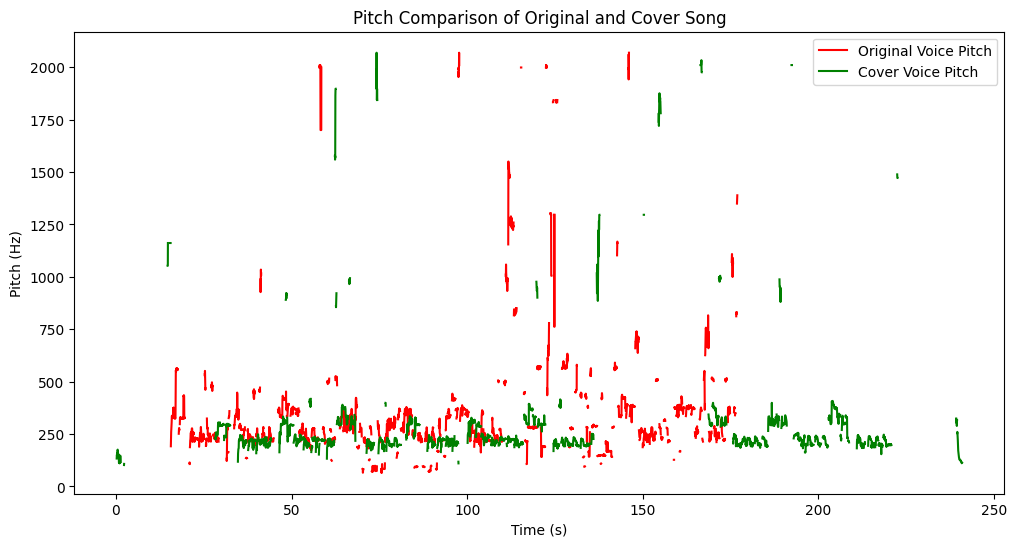

In [121]:
# # Create a time vector
# times = librosa.times_like(f0_original_audio)

# # Interpolate f0_cover_audio to match the length of times
# interp_func = interp1d(times, f0_original_audio)
# interpolated_f0_cover_audio = interp_func(times, f0_cover_audio)

# # Now you can plot both arrays
# plt.plot(times, f0_original_audio, label='Original Audio Pitch', color='blue')
# plt.plot(times, interpolated_f0_cover_audio, label='Cover Audio Pitch', color='red')

# # Trim f0_cover_audio to match the length of times
# f0_cover_audio = f0_cover_audio[:len(times)]

# # Now you can plot both arrays
# plt.plot(times, f0_original_audio, label='Original Audio Pitch', color='blue')
# plt.plot(times, f0_cover_audio, label='Cover Audio Pitch', color='red')

# plt.figure(figsize=(12, 6))
# # plt.plot(times, f0_original_audio, label='Original Audio Pitch', color='blue')
# # plt.plot(times, f0_cover_audio, label='Cover Audio Pitch', color='red')
# plt.title('Pitch Comparison of Original and Cover Song')
# plt.xlabel('Time (s)')
# plt.ylabel('Pitch (Hz)')
# plt.legend()
# plt.show()

# y_original_voice - y_voice - f0_voice - f0_original_audio
# y_cover_voice - y_instrument - f0_instrument - f0_cover_audio



# Create a time vector
times = librosa.times_like(f0_original_audio)
times1 = librosa.times_like(f0_cover_audio)

plt.figure(figsize=(12, 6))
plt.plot(times, f0_original_audio, label='Original Voice Pitch', color='red')
plt.plot(times1, f0_cover_audio, label='Cover Voice Pitch', color='green')
plt.title('Pitch Comparison of Original and Cover Song')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()

plt.show()

Calculate a score for the singing performance based on the variation of the pitch of singing voice and accompanied music track.

No marks will be given if the pitch difference is higher than 100 Hz. **Marks are calculated out of 10**.

In [124]:
# Calculate time step (frame size in seconds)
frame_length = len(f0_original_audio) / len(y_original_voice)

# Initialize variables for scoring
total_marks = 0
max_possible_marks = 0

# Iterate through pitch data and calculate marks
for i in range(len(f0_original_audio)):
    pitch_original_voice = f0_original_audio[i]
    pitch_cover_voice = f0_cover_audio[i]

    if not np.isnan(pitch_original_voice) and not np.isnan(pitch_cover_voice):
        pitch_difference = abs(pitch_original_voice - pitch_cover_voice)

        if pitch_difference < 1.0:
            marks = 10
        elif pitch_difference < 5.0:
            marks = 9
        elif pitch_difference < 10.0:
            marks = 8
        elif pitch_difference < 20.0:
          marks = 7
        elif pitch_difference < 30.0:
            marks = 6
        elif pitch_difference < 40.0:
            marks = 5
        elif pitch_difference < 50.0:
            marks = 4
        elif pitch_difference < 70.0:
            marks = 3
        elif pitch_difference < 80.0:
            marks = 2
        elif pitch_difference < 100.0:
            marks = 1
        else:
            marks = 0
    else:
        marks = 0

    # Update total marks
    total_marks += marks

    # Update the maximum possible marks
    max_possible_marks += 10  # Assuming each second can earn a maximum of 10 marks

# Normalize the final marks to a 0-10 scale
final_marks = (total_marks / max_possible_marks) * 10

# Print the final marks
print(f'Final Marks out of 10: {final_marks:.2f}')

Final Marks out of 10: 1.40
